In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

import config
import parameter_estimation

In [14]:
def plot_parameter(filename):
    df = np.load(config.data_path + "/" + filename)
    samples = df["samples"]

    if "parameter" in df:
        parameter = df["parameter"]
    else:
        #                          mean value, lower error, upper error
        parameter = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

    print("PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR")
    for name, ip, ie, p in zip(parameter_estimation.parameter_names, parameter_estimation.inital_guess, 
                               parameter_estimation.errors, parameter):
        print(name + " " * (len("Lambda_QCD") - len(name)), 
              "%e" % ip, "+/-", "%e" % ie, "vs", "%e" % p[0], "+", "%e" % p[1], "-", "%e" % p[2])
    
    try:
        corner.corner(samples, labels=parameter_estimation.parameter_names)
    except:
        pass
    
    plt.show()
    
    for i, (name, x0, x_err) in enumerate(zip(parameter_estimation.parameter_names,
                                              parameter_estimation.inital_guess,
                                              parameter_estimation.errors)):
        ps = samples[:, i]
        if i > 1:
            vals = np.linspace(np.min(ps), np.max(ps), ps.size)
            plt.plot(vals, np.exp(- (vals - x0)**2 / (2 * x_err**2)) / np.sqrt(2 * np.pi * x_err**2))
        try:
            plt.hist(ps, histtype="step", bins=80, density=True, color="black")
        except:
            print(name, "doesnt work")
        plt.xlabel(name)
        plt.show()

    plt.plot(samples[:, 1], samples[:, 0], ".")
    plt.ylabel("theta_i")
    plt.xlabel("f_a")

PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR
theta_i    1.000000e+00 +/- 0.000000e+00 vs 1.000047e+00 + 1.182513e-02 - 9.163560e-03
log_f_a    2.100000e+01 +/- 0.000000e+00 vs 2.097300e+01 + 6.168139e-03 - 8.248206e-03
M_pl       2.435403e+27 +/- 2.792596e+22 vs 2.435399e+27 + 4.126667e+22 - 4.485956e+22
Lambda_QCD 2.000000e+08 +/- 2.000000e+07 vs 1.999784e+08 + 4.501572e+06 - 3.350368e+06
m_u        2.300000e+06 +/- 3.750000e+05 vs 2.299671e+06 + 5.813282e+04 - 3.134434e+04
m_d        4.800000e+06 +/- 3.250000e+05 vs 4.800545e+06 + 9.072892e+04 - 8.332833e+04
m_pi       1.349770e+08 +/- 5.000000e+02 vs 1.349769e+08 + 7.814582e+02 - 8.417125e+02
f_pi       9.192388e+07 +/- 5.000000e+06 vs 9.197151e+07 + 1.653081e+06 - 1.846428e+06
T0         2.348653e-04 +/- 5.170398e-09 vs 2.348661e-04 + 8.568592e-09 - 7.444952e-09
rho_c      3.667106e-11 +/- 9.808371e-14 vs 3.667762e-11 + 8.976618e-14 - 1.020090e-13


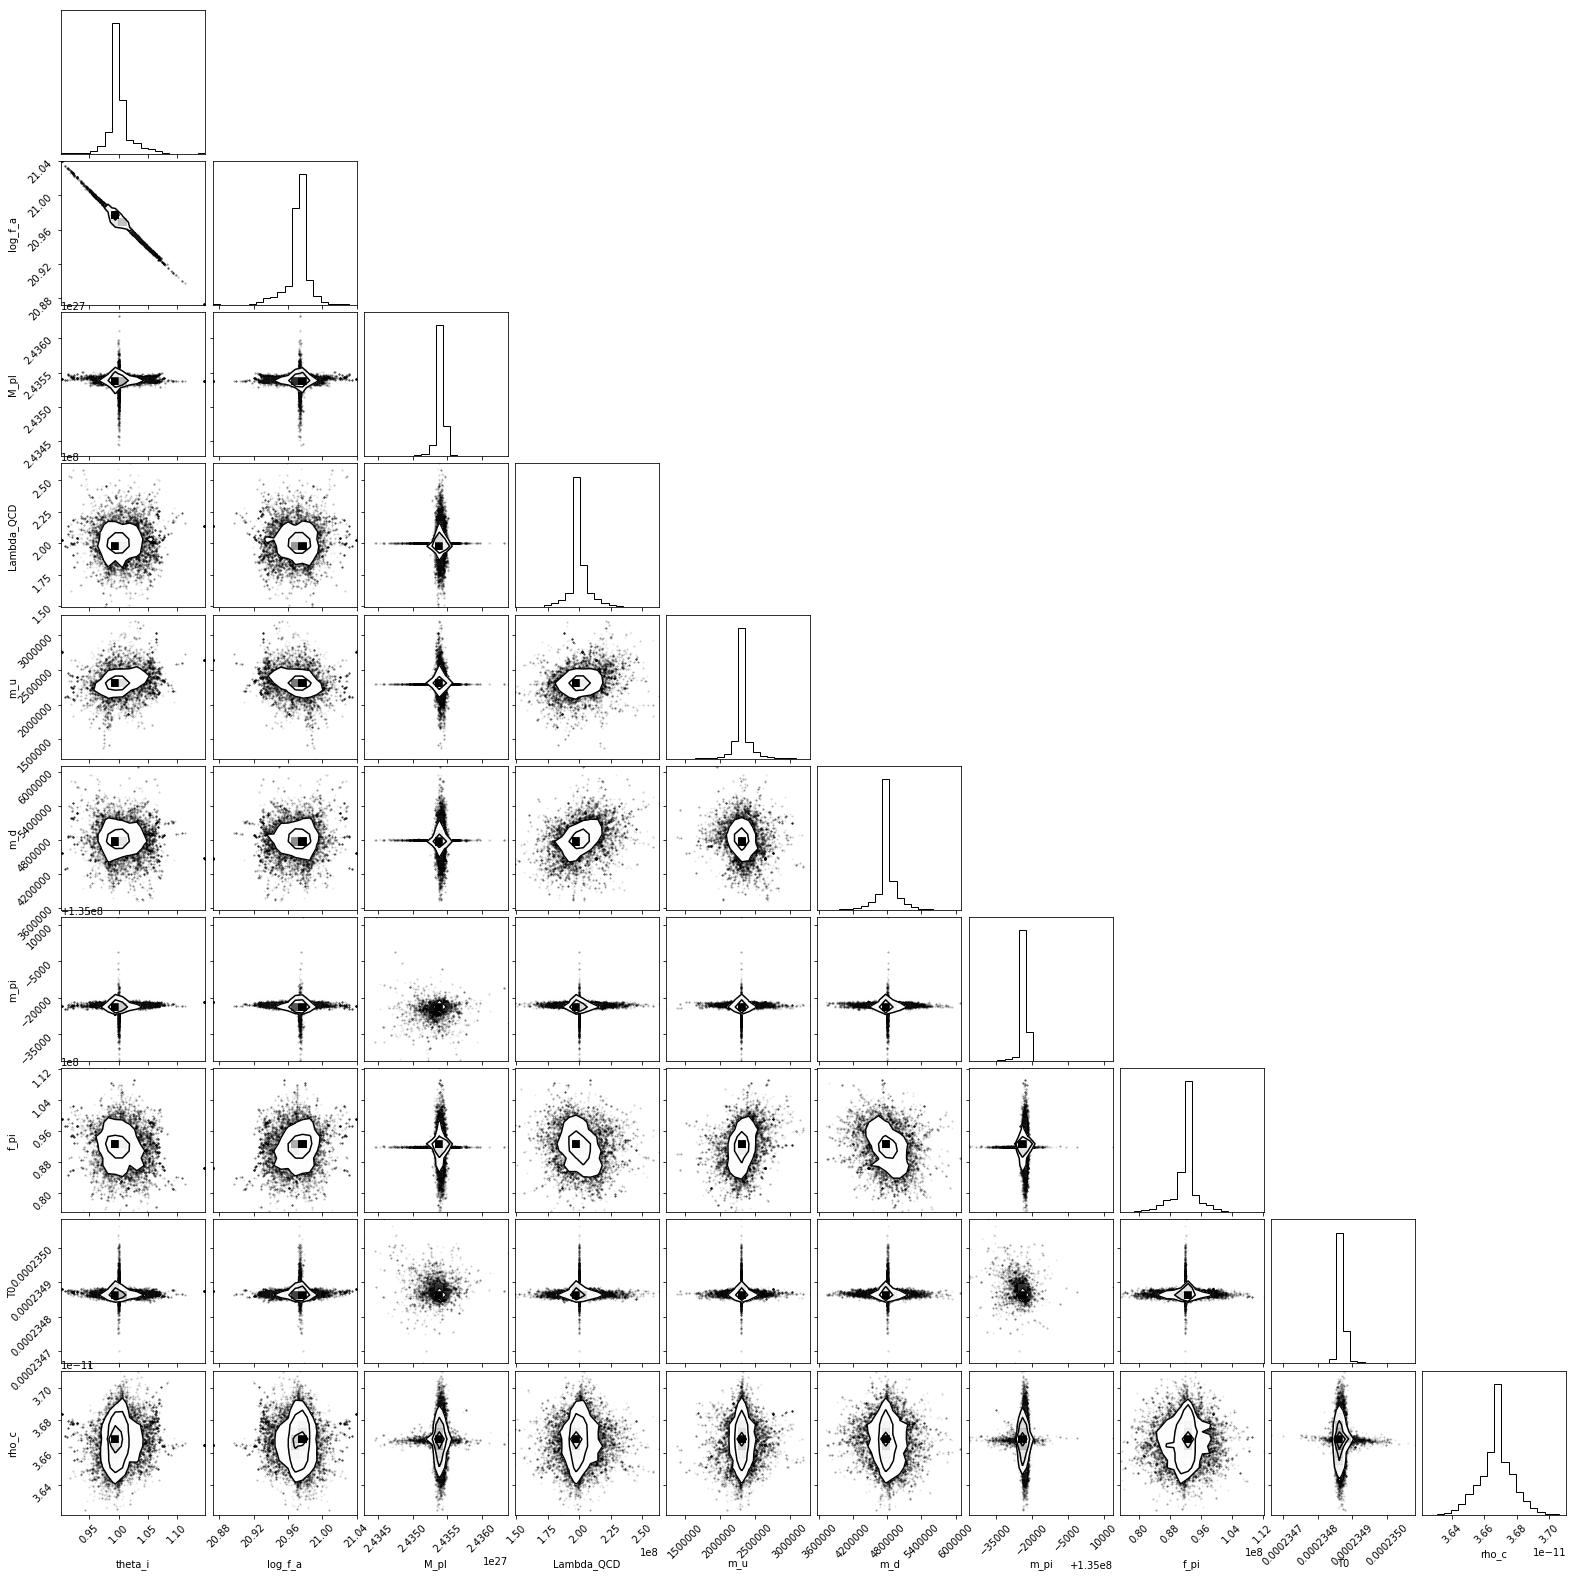

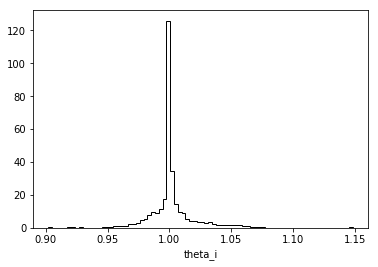

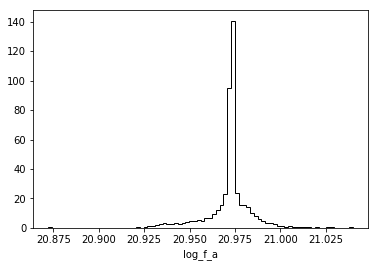

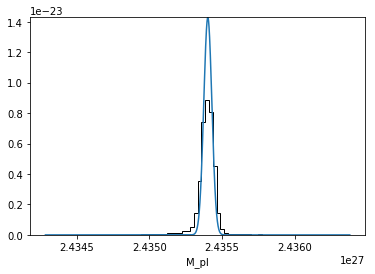

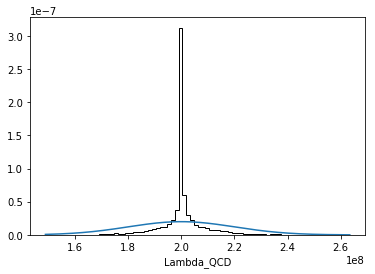

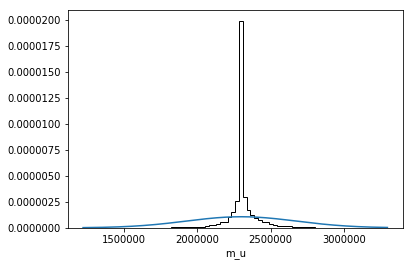

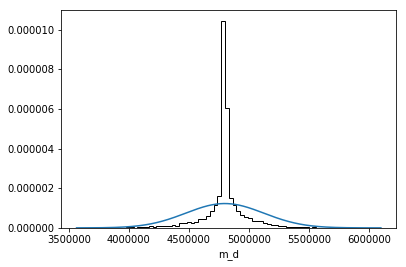

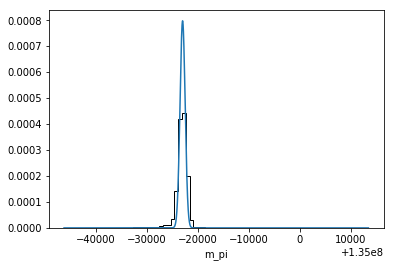

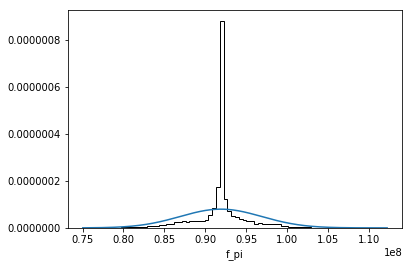

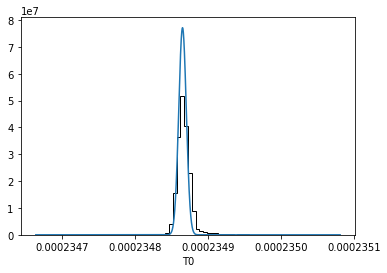

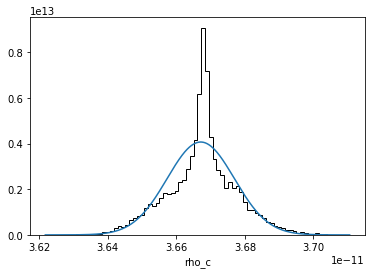

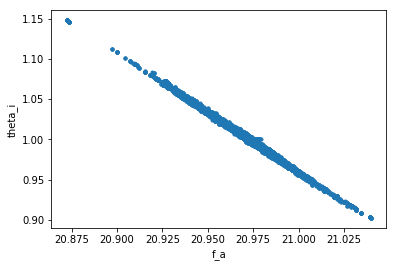

In [15]:
plot_parameter("ball-parameter.npz") # theta, f uniform initialized around (1, 1e12 GeV), wrong mass dep.

PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR
theta_i    1.000000e+00 +/- 0.000000e+00 vs 1.459821e+00 + 1.256581e-01 - 9.238889e-02
log_f_a    2.100000e+01 +/- 0.000000e+00 vs 2.066587e+01 + 6.393680e-02 - 6.463347e-02
M_pl       2.435403e+27 +/- 2.792596e+22 vs 2.435413e+27 + 1.438482e+25 - 7.019213e+22
Lambda_QCD 2.000000e+08 +/- 2.000000e+07 vs 2.270638e+08 + 2.147205e+07 - 3.239836e+07
m_u        2.300000e+06 +/- 3.750000e+05 vs 2.209126e+06 + 2.767003e+05 - 2.109488e+05
m_d        4.800000e+06 +/- 3.250000e+05 vs 4.969837e+06 + 4.397735e+05 - 5.018707e+05
m_pi       1.349770e+08 +/- 5.000000e+02 vs 1.349764e+08 + 1.449183e+03 - 5.848673e+04
f_pi       9.192388e+07 +/- 5.000000e+06 vs 8.787208e+07 + 7.188678e+06 - 7.330875e+06
T0         2.348653e-04 +/- 5.170398e-09 vs 2.348576e-04 + 1.294049e-08 - 5.230575e-06
rho_c      3.667106e-11 +/- 9.808371e-14 vs 3.673938e-11 + 8.091872e-13 - 1.131584e-12


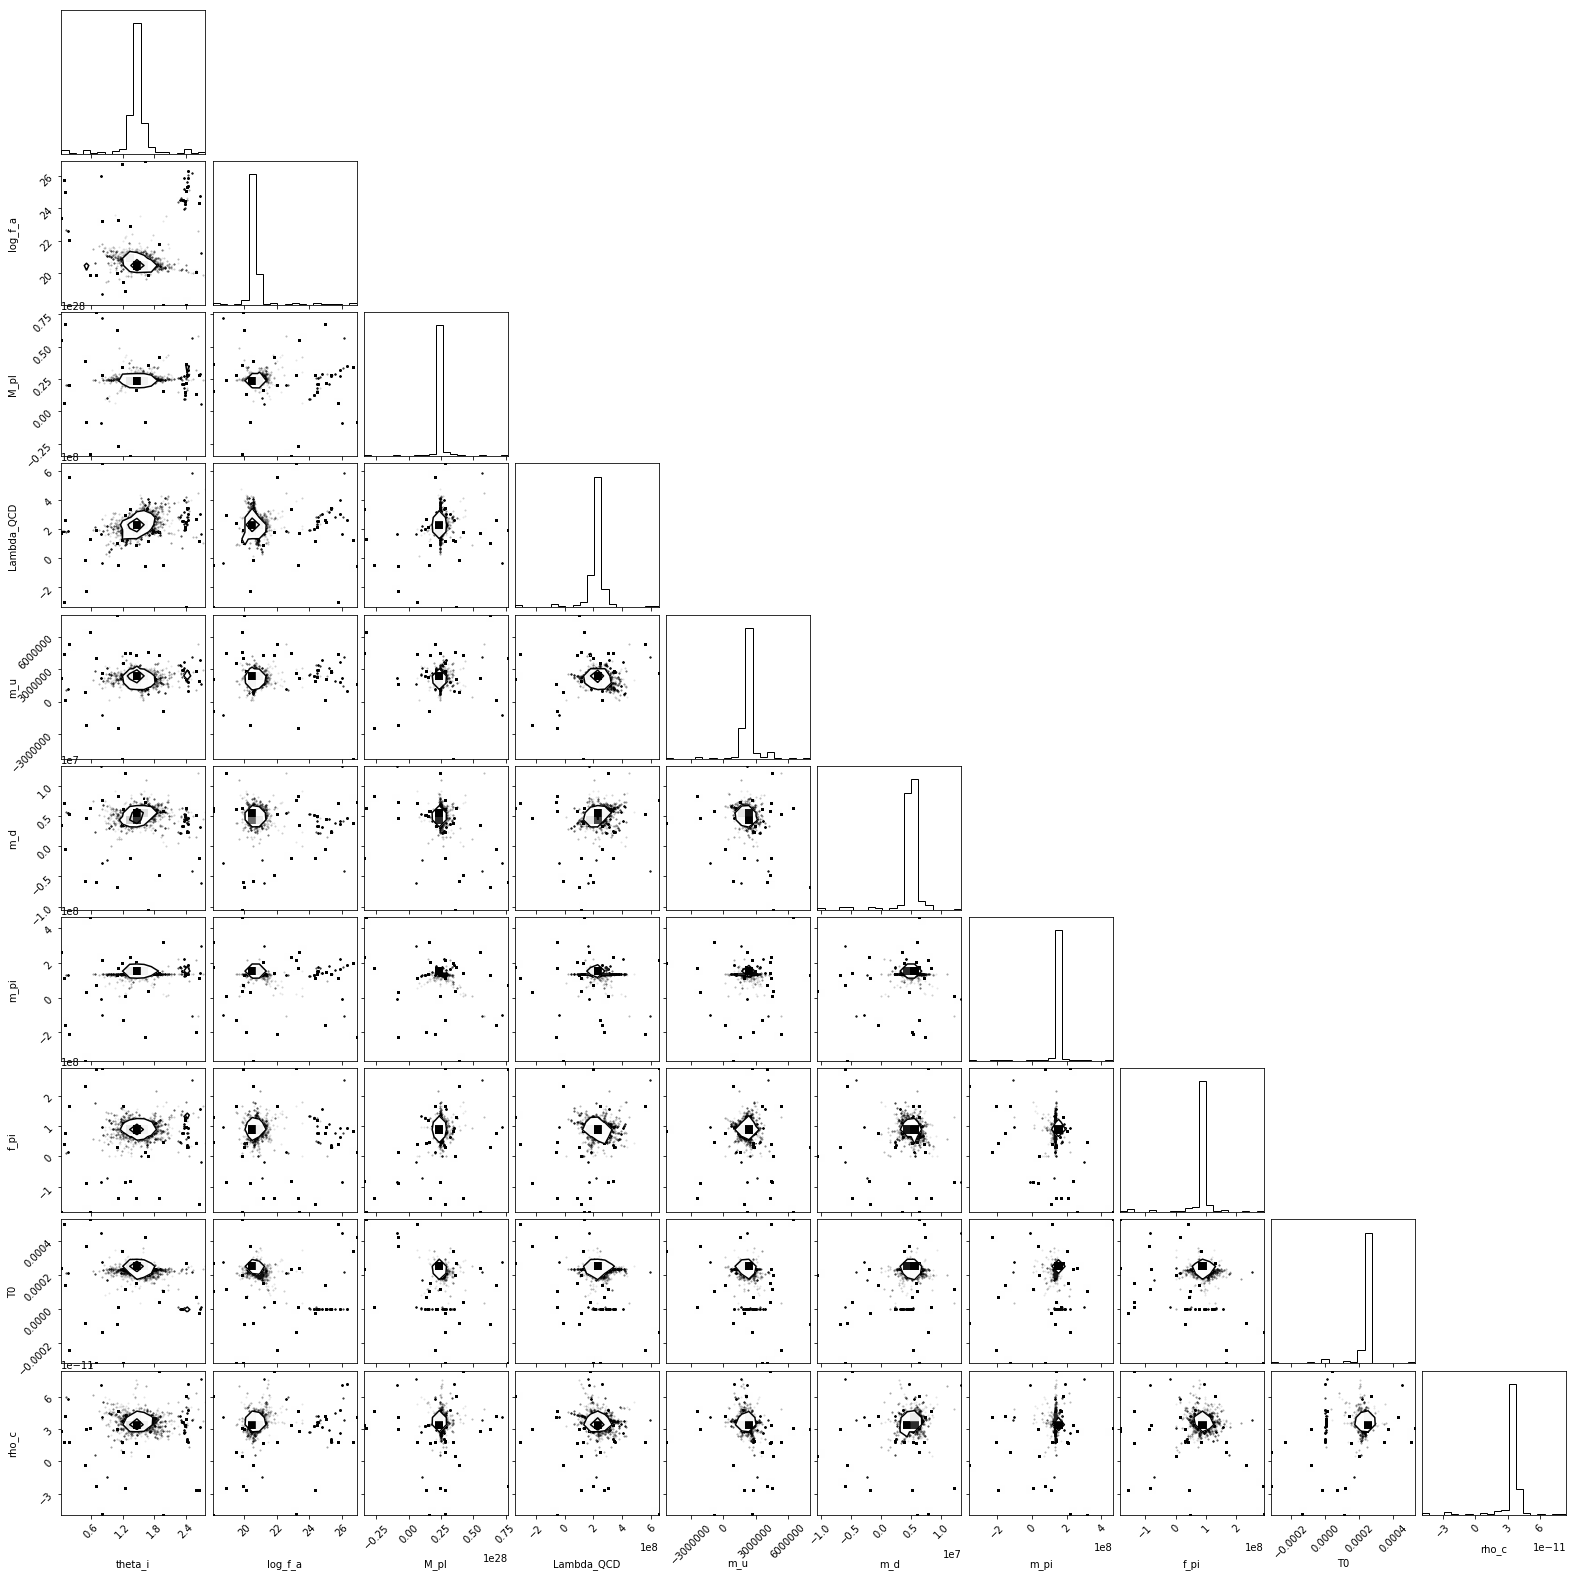

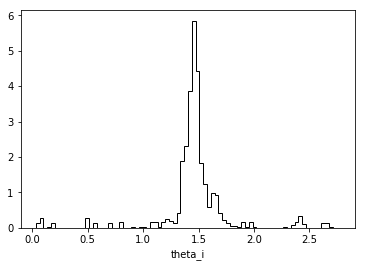

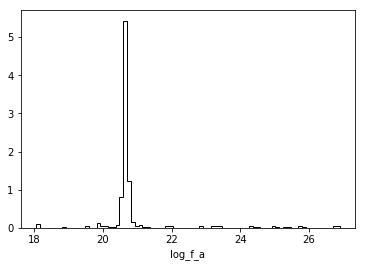

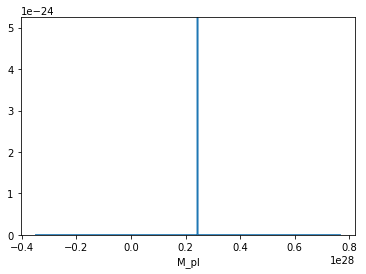

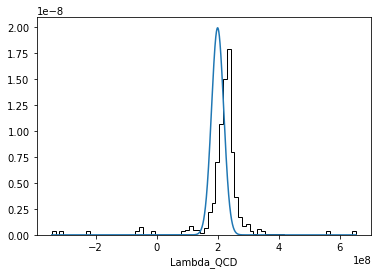

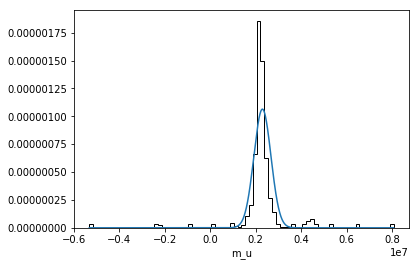

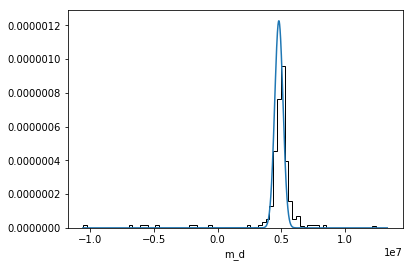

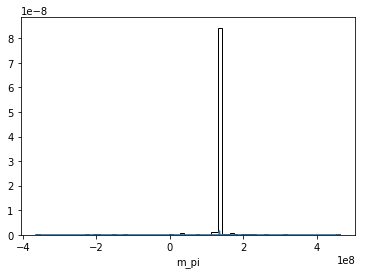

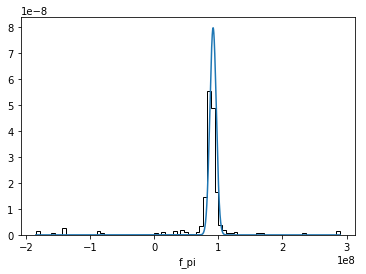

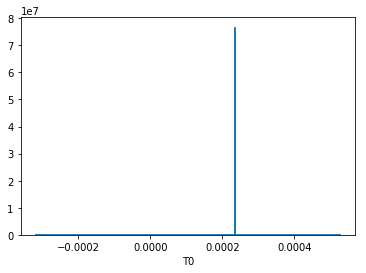

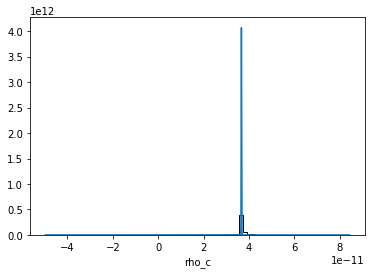

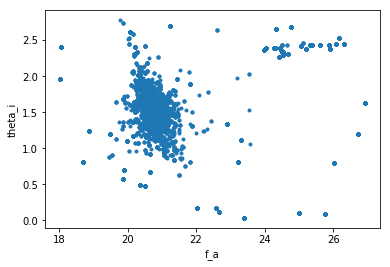

In [16]:
plot_parameter("uniform-parameter.npz") # theta, f uniformly initialized, wrong mass dep.

PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR
theta_i    1.000000e+00 +/- 0.000000e+00 vs 1.475903e+00 + 7.498359e-02 - 6.051144e-02
log_f_a    2.100000e+01 +/- 0.000000e+00 vs 2.067832e+01 + 8.888893e-02 - 2.233422e-02
M_pl       2.435403e+27 +/- 2.792596e+22 vs 2.435403e+27 + 1.513677e+24 - 4.975144e+23
Lambda_QCD 2.000000e+08 +/- 2.000000e+07 vs 2.453828e+08 + 8.339910e+06 - 1.121987e+07
m_u        2.300000e+06 +/- 3.750000e+05 vs 1.684233e+06 + 1.314075e+05 - 1.712500e+05
m_d        4.800000e+06 +/- 3.250000e+05 vs 4.058924e+06 + 3.142717e+05 - 2.210381e+05
m_pi       1.349770e+08 +/- 5.000000e+02 vs 1.349773e+08 + 6.362512e+03 - 3.603455e+04
f_pi       9.192388e+07 +/- 5.000000e+06 vs 9.032711e+07 + 6.297873e+06 - 6.562898e+06
T0         2.348653e-04 +/- 5.170398e-09 vs 2.348549e-04 + 1.510493e-08 - 1.008811e-05
rho_c      3.667106e-11 +/- 9.808371e-14 vs 3.703265e-11 + 3.546399e-12 - 3.706608e-13


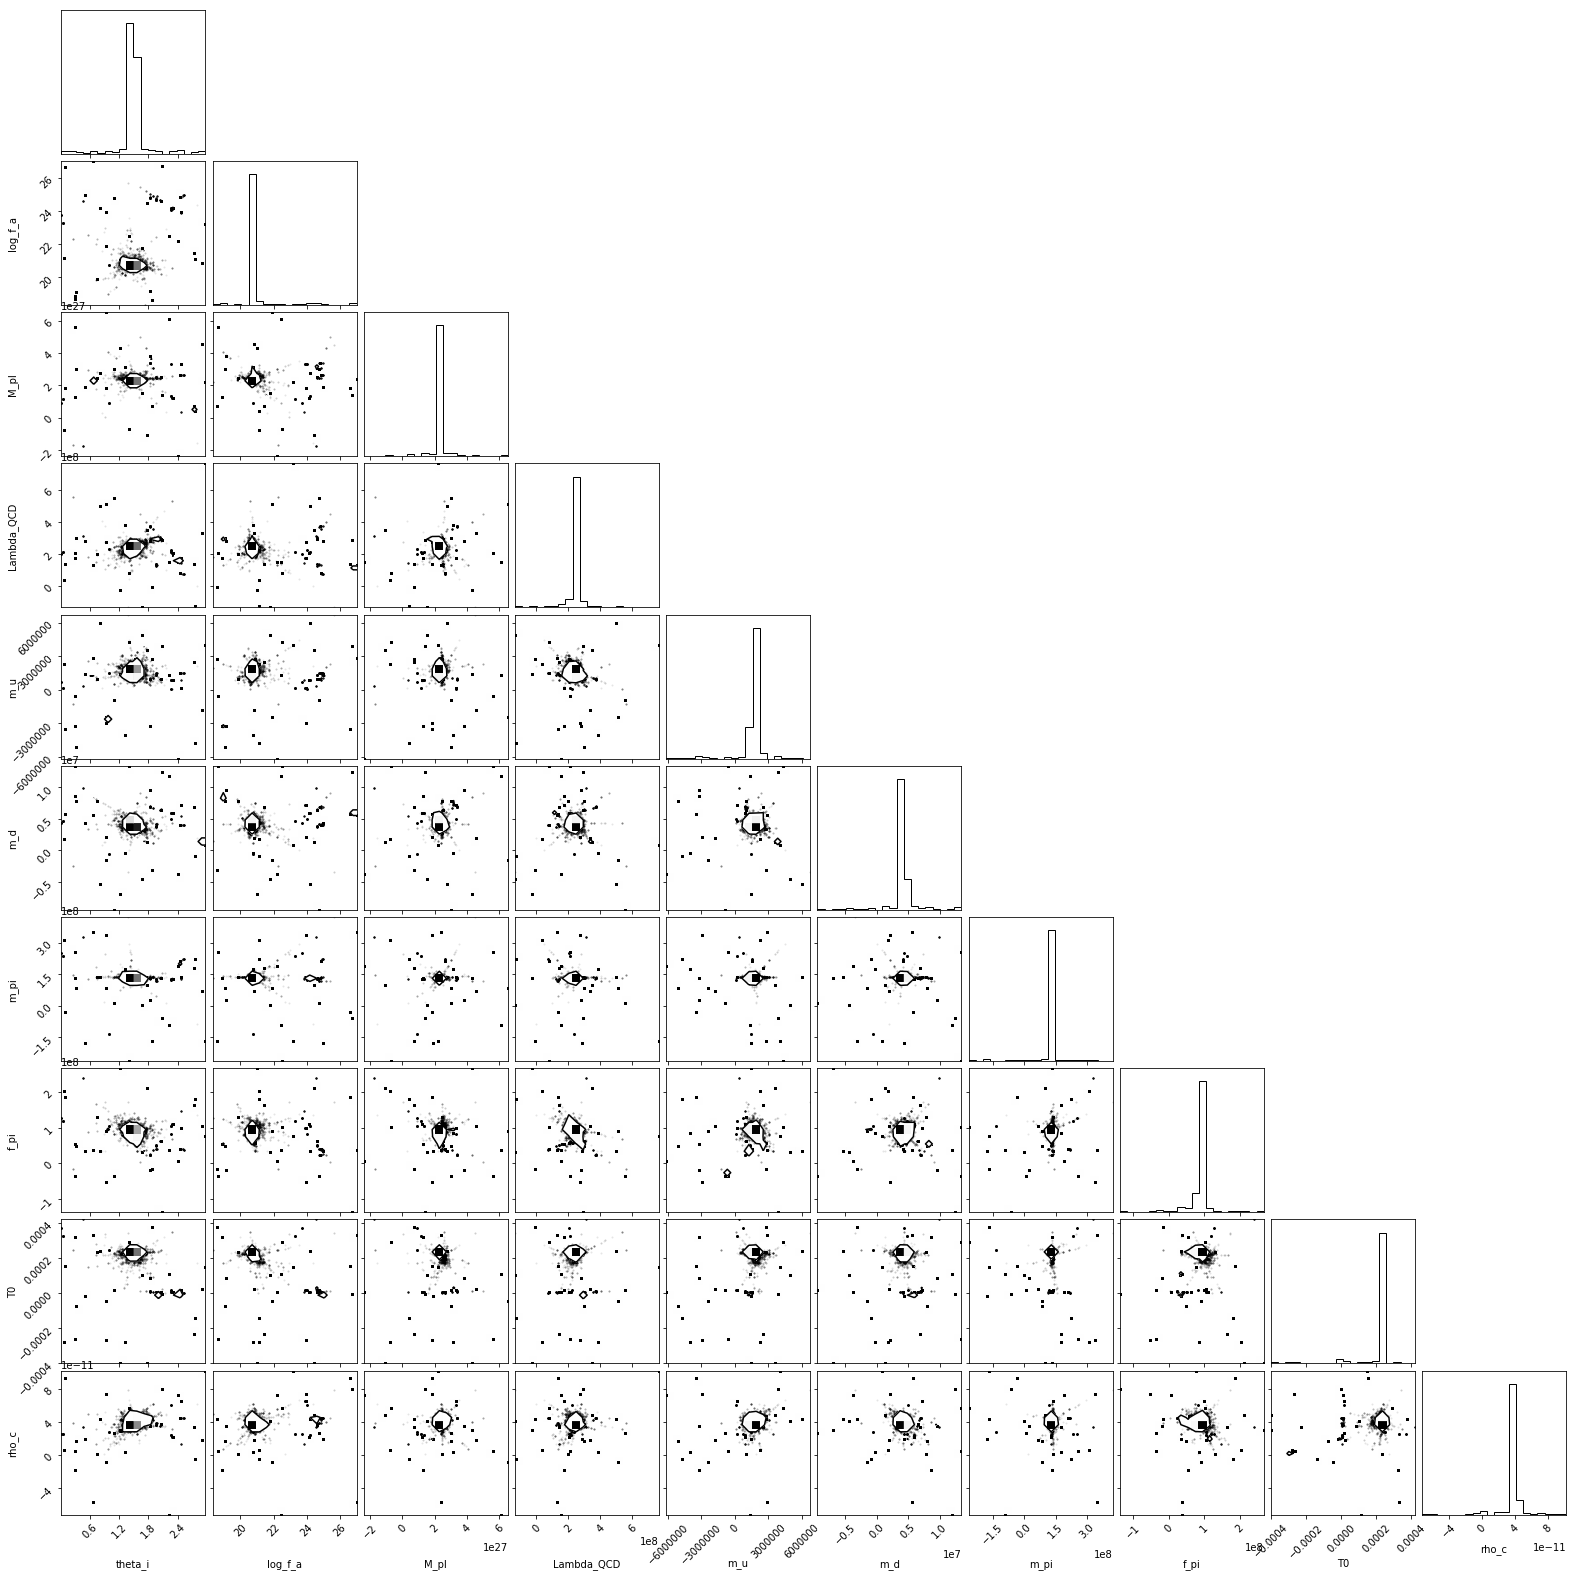

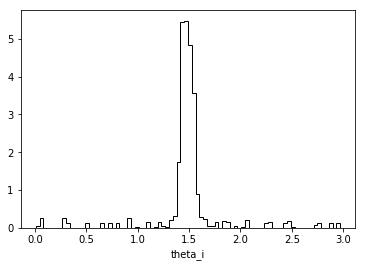

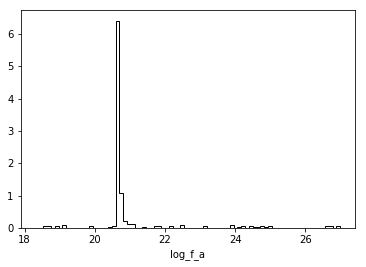

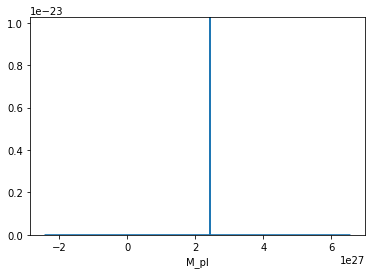

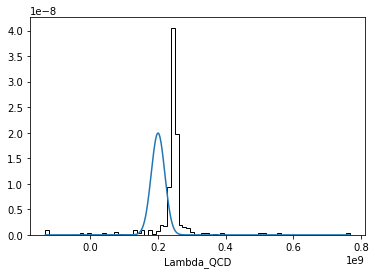

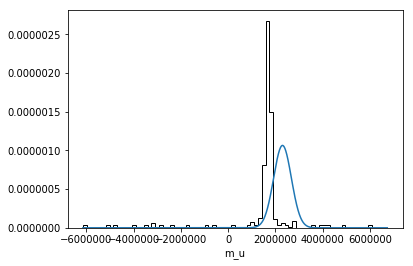

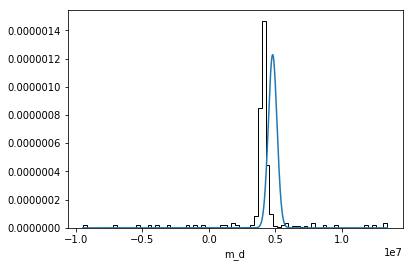

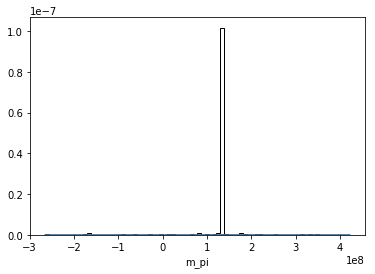

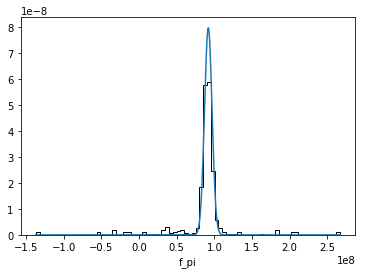

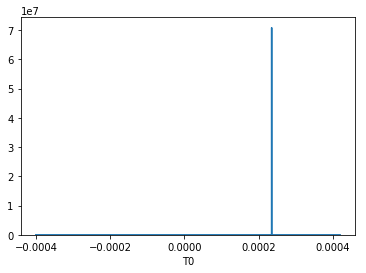

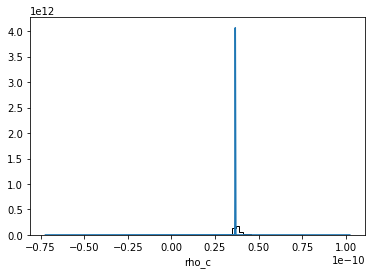

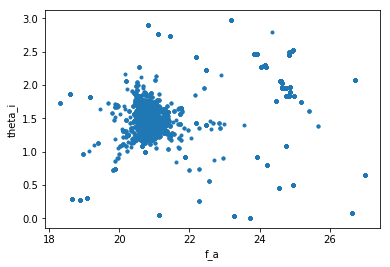

In [17]:
plot_parameter("c-uniform-parameter-normalized.npz") # theta, f uniformly initialized with normalization, using the c code

PARAMETER  INITIAL-VALUE    INITIAL-ERROR   MCMC-MEAN      +MCMC-ERR      -MCMC-ERR
theta_i    1.000000e+00 +/- 0.000000e+00 vs 1.156980e+00 + 6.035848e-01 - 6.321629e-01
log_f_a    2.100000e+01 +/- 0.000000e+00 vs 2.058184e+01 + 9.097416e-01 - 8.322507e-01
M_pl       2.435403e+27 +/- 2.792596e+22 vs 2.435403e+27 + 0.000000e+00 - 0.000000e+00
Lambda_QCD 2.000000e+08 +/- 2.000000e+07 vs 2.000000e+08 + 1.812411e+00 - 2.009207e+00
m_u        2.300000e+06 +/- 3.750000e+05 vs 2.300000e+06 + 1.604411e+00 - 1.921095e+00
m_d        4.800000e+06 +/- 3.250000e+05 vs 4.800000e+06 + 6.906024e+00 - 2.443942e+00
m_pi       1.349770e+08 +/- 5.000000e+02 vs 1.349770e+08 + 2.638807e+00 - 1.846486e+00
f_pi       9.192388e+07 +/- 5.000000e+06 vs 9.192388e+07 + 5.227795e+00 - 7.127135e+00
T0         2.348653e-04 +/- 5.170398e-09 vs 4.490957e-03 + 8.218876e-01 - 2.436148e-01
rho_c      3.667106e-11 +/- 9.808371e-14 vs 5.814792e-09 + 3.552966e-05 - 8.890583e-01


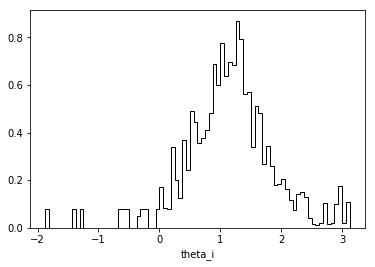

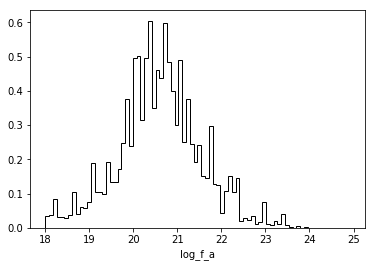

M_pl doesnt work


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:731: RuntimeWarning: divide by zero encountered in double_scalars
  norm = bins / (mx - mn)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:756: RuntimeWarning: invalid value encountered in multiply
  tmp_a *= norm


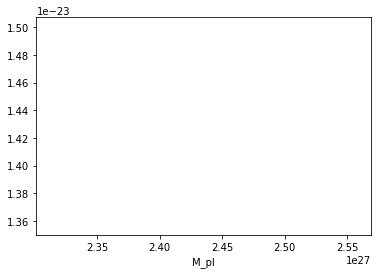

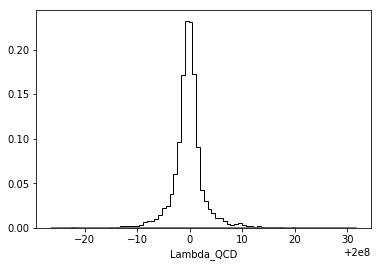

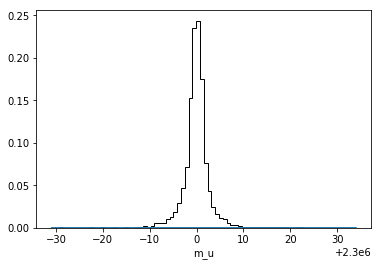

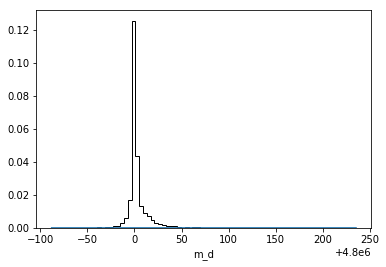

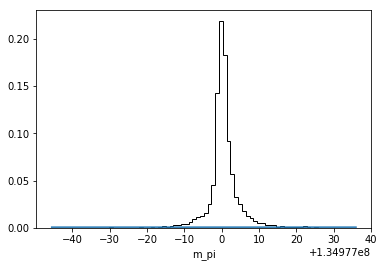

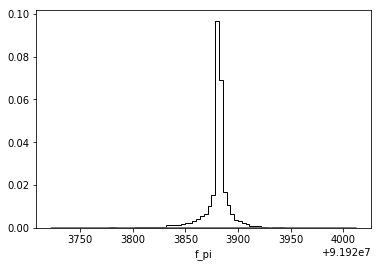

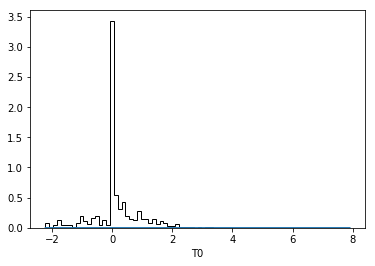

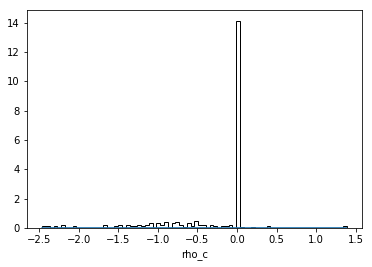

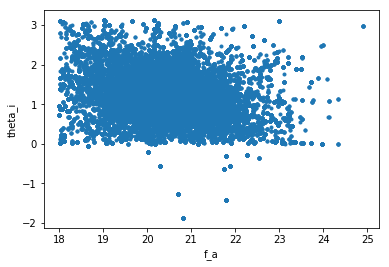

In [18]:
plot_parameter("parameter.npz")